In [1]:
import numpy as np
import pandas as pd
import datetime
from slugify import slugify

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [3]:
df = pd.read_csv('breweries.csv', header=0)

In [4]:
df.head()

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,phone,website_url,longitude,latitude
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,NaN,NaN,Norman,Oklahoma,73069-8224,United States,4058160490,http://www.405brewing.com,-97.468182,35.257389
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,NaN,NaN,Austin,Texas,78745-1197,United States,5129211545,http://www.512brewing.com,NaN,NaN
2,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,NaN,NaN,San Diego,California,92101-6618,United States,6195782311,http://10barrel.com,-117.129593,32.714813
3,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,NaN,NaN,Bend,Oregon,97701-9847,United States,5415851007,http://www.10barrel.com,-121.281706,44.086835
4,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,NaN,NaN,Bend,Oregon,97703-2465,United States,5415851007,NaN,-121.328802,44.057565


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8211 entries, 0 to 8210
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8211 non-null   object 
 1   name            8211 non-null   object 
 2   brewery_type    8211 non-null   object 
 3   address_1       7428 non-null   object 
 4   address_2       92 non-null     object 
 5   address_3       26 non-null     object 
 6   city            8211 non-null   object 
 7   state_province  8211 non-null   object 
 8   postal_code     8211 non-null   object 
 9   country         8211 non-null   object 
 10  phone           7368 non-null   object 
 11  website_url     7016 non-null   object 
 12  longitude       5818 non-null   float64
 13  latitude        5818 non-null   float64
dtypes: float64(2), object(12)
memory usage: 898.2+ KB


In [6]:
# Filter the data by country
country = 'United States'
filtered_df = df[df['country'] == country]

# Clean the data
cleaned_df = filtered_df.dropna()

In [7]:
df.head()

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,phone,website_url,longitude,latitude
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,NaN,NaN,Norman,Oklahoma,73069-8224,United States,4058160490,http://www.405brewing.com,-97.468182,35.257389
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,NaN,NaN,Austin,Texas,78745-1197,United States,5129211545,http://www.512brewing.com,NaN,NaN
2,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,NaN,NaN,San Diego,California,92101-6618,United States,6195782311,http://10barrel.com,-117.129593,32.714813
3,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,NaN,NaN,Bend,Oregon,97701-9847,United States,5415851007,http://www.10barrel.com,-121.281706,44.086835
4,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,NaN,NaN,Bend,Oregon,97703-2465,United States,5415851007,NaN,-121.328802,44.057565


In [8]:
# Show only the brewery_type
print(df['brewery_type'].unique())

['micro' 'large' 'brewpub' 'closed' 'proprietor' 'contract' 'regional'
 'planning' 'nano' 'taproom' 'bar']


In [9]:
# Group by state and count the number of breweries
state_counts = df.groupby('state_province')['brewery_type'].nunique()

# Display the results
print(state_counts)

state_province
 Busan          1
 Utah           1
Alabama         4
Alaska          6
Argyll          1
               ..
Wexford         1
Wicklow         2
Wisconsin       8
Wyoming         5
dolnośląskie    3
Name: brewery_type, Length: 115, dtype: int64


In [10]:
# Calculate the average number of breweries per state
average_breweries = df['brewery_type'].nunique() / df['state_province'].nunique()

# Display the result
print(f'The average number of breweries per state is {average_breweries:.2f}.')

The average number of breweries per state is 0.10.


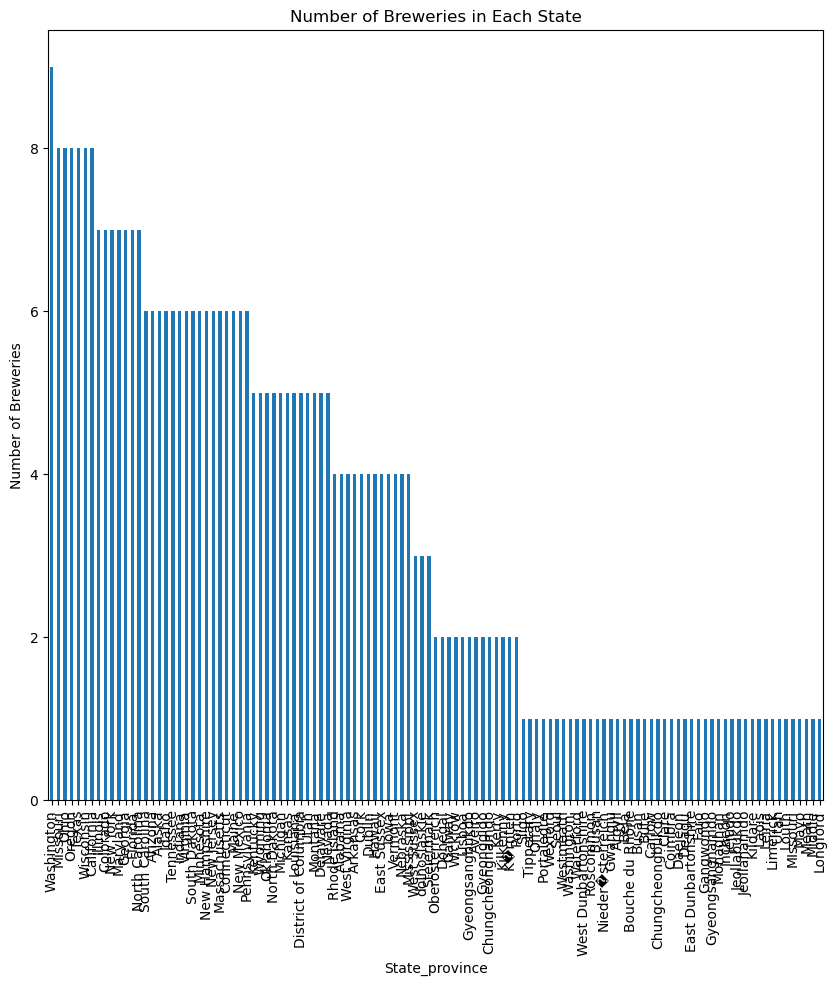

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by state and calculate the number of breweries in each state
grouped = df.groupby('state_province')['brewery_type'].nunique()

# Sort the data by the number of breweries in descending order
sorted_grouped = grouped.sort_values(ascending=False)

# Create the bar chart
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sorted_grouped.plot(kind='bar', ax=ax)
plt.xlabel('State_province')
plt.ylabel('Number of Breweries')
plt.title('Number of Breweries in Each State')
plt.show()

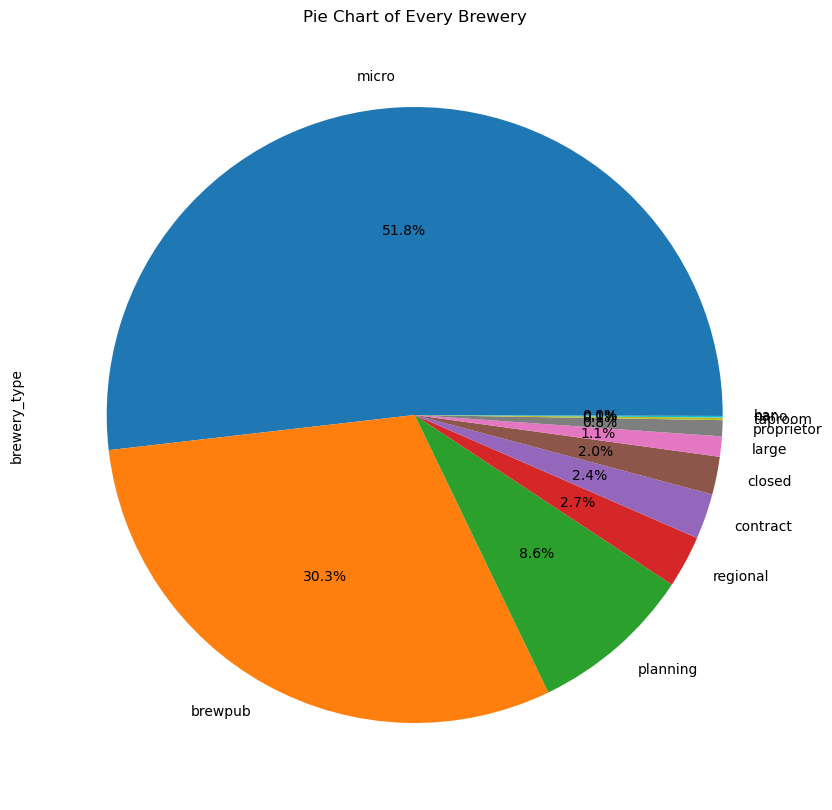

In [12]:
# Create a pie chart of every brewery
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df['brewery_type'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%')
plt.title('Pie Chart of Every Brewery')
plt.show()

In [13]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

In [21]:
# Create SQLite datbase
engine = create_engine("sqlite:///database.sqlite")
conn = engine.connect()
filtered_df.to_sql("database", conn)

7940

In [22]:
# Check our data is printing
data = pd.read_sql("SELECT * FROM database", conn)
data.head()

,index,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,phone,website_url,longitude,latitude
0,0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,4058160490,http://www.405brewing.com,-97.468182,35.257389
1,1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,5129211545,http://www.512brewing.com,NaN,NaN
2,2,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,6195782311,http://10barrel.com,-117.129593,32.714813
3,3,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,5415851007,http://www.10barrel.com,-121.281706,44.086835
4,4,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,97703-2465,United States,5415851007,None,-121.328802,44.057565


In [12]:
import sqlite3
# Open a connection to the database
conn = sqlite3.connect('database.sqlite')
# Create a cursor object
c = conn.cursor()
# Execute a CREATE TABLE statement to create the table for the class
c.execute('''CREATE TABLE IF NOT EXISTS classes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL
)''')
# Execute an INSERT statement to add data to the table
c.execute("INSERT INTO classes (name) VALUES ('Brewery')")
# Commit the changes to the database
conn.commit()


In [15]:
# Execute a SELECT statement to get the class from the database
c.execute("SELECT * FROM classes WHERE name = 'Brewery'")
# Fetch the results of the query
results = c.fetchall()
# Check if the results are empty
if not results:
    print("The class does not exist in the database.")
else:
    print("The class exists in the database.")

The class exists in the database.
